In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
churn_df = pd.read_csv('/content/drive/MyDrive/churn v2.csv')

In [6]:
churn_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [8]:
X = churn_df[['Total Spend','Last Interaction']].values
y = churn_df['Churn'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 21, stratify = y)

[ 1  2  3  4  5  6  7  8  9 10] /n {1: 0.7348798674399337, 2: 0.6972245236122618, 3: 0.72970173985087, 4: 0.6853355426677713, 5: 0.6871582435791218, 6: 0.6584507042253521, 7: 0.6595070422535211, 8: 0.6399130074565037, 9: 0.6411557580778791, 10: 0.6257870753935377} /n {1: 0.5120541816826146, 2: 0.5210016155088854, 3: 0.5160929538958619, 4: 0.5218715049086616, 5: 0.5131104759537716, 6: 0.5214986951659003, 7: 0.5143531750963092, 8: 0.5191997017522058, 9: 0.5151609295389586, 10: 0.5192618367093327}


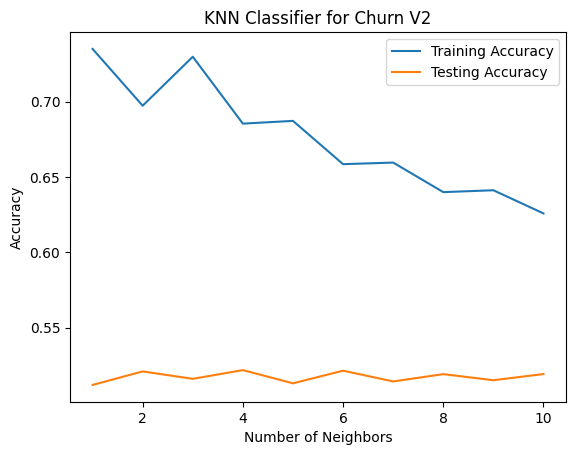

In [14]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracies = {}
testing_accuracies = {}
neighbors = np.arange(1,11)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train,y_train)
  training_accuracies[neighbor] = knn.score(X_train,y_train)
  testing_accuracies[neighbor] = knn.score(X_test,y_test)

print(neighbors, '/n', training_accuracies, '/n', testing_accuracies)

import matplotlib.pyplot as plt
plt.title('KNN Classifier for Churn V2')
plt.plot(neighbors, training_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, testing_accuracies.values(), label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
